<a href="https://colab.research.google.com/github/ReidelVichot/PUS2022_RVichot/blob/main/Week11_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
ls

ls: cannot access 'gdrive': Transport endpoint is not connected
ls: cannot access 'gdirve': Transport endpoint is not connected
drive/  gdirve/  gdrive/  sample_data/


In [19]:
cd /content/drive/My Drive

/content/drive/My Drive


In [20]:
ls kag?

Object `kag` not found.


In [21]:
ls kag*

kaggle.json


In [22]:
!chmod 600 kaggle.json

In [23]:
from IPython.core.display import json
envs = json.load(open("kaggle.json", "r"))

In [24]:
envs["username"]

'reidelvichot'

In [25]:
import os
os.environ["KAGGLE_USERNAME"] = envs["username"]
os.environ["KAGGLE_KEY"] = envs["key"]

In [26]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
!kaggle datasets list

ref                                                             title                                       size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                             9KB  2022-10-06 08:55:25          12884        409  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset             COVID -19 Coronavirus Pandemic Dataset      11KB  2022-09-30 04:05:11          10210        318  1.0              
thedevastator/240000-household-electricity-consumption-records  Household Electricity Consumption            3MB  2022-10-24 01:22:40            852         27  1.0              
akshaydattatraykhare/data-for-admission-in-the-university       Data for Admission in the University     

In [28]:
!mkdir TitanicKaggleData

mkdir: cannot create directory ‘TitanicKaggleData’: File exists


In [29]:
cd TitanicKaggleData/

/content/drive/My Drive/TitanicKaggleData


In [30]:
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [31]:
ls

gender_submission.csv  test.csv  titanic.zip  train.csv


In [32]:
!unzip titanic.zip

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [33]:
import pandas as pd
titanic = pd.read_csv("train.csv")[["Survived", "Pclass", "Age", "Sex"]]
titanic.shape

(891, 4)

In [34]:
titanic["gender"] = titanic["Sex"].map({"male":0, "female":1})

In [35]:
titanic.drop("Sex", axis = 1, inplace= True)

In [36]:
titanic.dropna(how="any", axis=0, inplace= True)  #axis 0 removes the row

In [37]:
titanic

,Survived,Pclass,Age,gender
0,0,3,22.0,0
1,1,1,38.0,1
2,1,3,26.0,1
3,1,1,35.0,1
4,0,3,35.0,0
...,...,...,...,...
885,0,3,39.0,1
886,0,2,27.0,0
887,1,1,19.0,1
889,1,1,26.0,0


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic[["Pclass", "Age", "gender"]].values,
                                                    titanic["Survived"].values, train_size= 0.75,
                                                    random_state=123)

In [43]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3, random_state=222)
clf.fit(X_train, y_train)
print("accuracy on training data {:.2}".format(clf.score(X_train, y_train)))

accuracy on training data 0.81


In [45]:
print("accuracy on test data {:.2}".format(clf.score(X_test, y_test)))

accuracy on test data 0.76


In [54]:
# Random Forest clasifier
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=3)
clf_rf.fit(X_train, y_train)
print("accuracy on training data {:.2}".format(clf_rf.score(X_train, y_train)))
print("accuracy on testing data {:.2}".format(clf_rf.score(X_test, y_test)))

accuracy on training data 0.83
accuracy on testing data 0.81


In [57]:
# GredientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
clf_gdb = GradientBoostingClassifier(max_depth=3)
clf_gdb.fit(X_train, y_train)
print("accuracy on training data {:.2}".format(clf_gdb.score(X_train, y_train)))
print("accuracy on testing data {:.2}".format(clf_gdb.score(X_test, y_test)))

accuracy on training data 0.88
accuracy on testing data 0.82


In [58]:
clf_rf.feature_importances_

array([0.2996055 , 0.15169486, 0.54869963])

In [59]:
import numpy as np
index = np.argsort(clf_rf.feature_importances_)

In [63]:
columns = np.array(["Pclass", "Age", "gender"])[index]

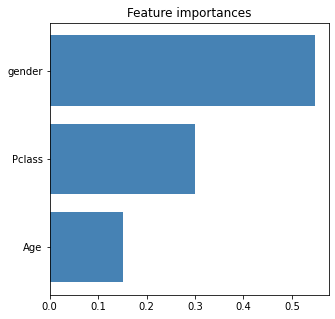

In [68]:
import pylab as plt
plt.figure(figsize=(5,5))
plt.title("Feature importances")
plt.barh([0, 1, 2], clf_rf.feature_importances_[index],
        color="Steelblue", align="center")
plt.yticks(range(len(columns)), columns);
plt.show()